# ``atmosphere.py`` tutorial

This tutorial needs your help to make it better!

This tutorial requires pvlib > 0.6.0.

Authors:
* Will Holmgren (@wholmgren), University of Arizona. 2015, March 2016, August 2018.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# built in python modules
import datetime
import logging
import os
import inspect

# python add-ons
import numpy as np
import pandas as pd

In [2]:
import pvlib
from pvlib.location import Location

In [3]:
tus = Location(32.2, -111, 'US/Arizona', 700, 'Tucson')

In [4]:
print(tus)

Location: 
  name: Tucson
  latitude: 32.2
  longitude: -111
  altitude: 700
  tz: US/Arizona


                           apparent_zenith      zenith  apparent_elevation  \
2014-06-24 00:00:00-07:00       124.039086  124.039086          -34.039086   
2014-06-24 00:01:00-07:00       124.065488  124.065488          -34.065488   
2014-06-24 00:02:00-07:00       124.090882  124.090882          -34.090882   
2014-06-24 00:03:00-07:00       124.115267  124.115267          -34.115267   
2014-06-24 00:04:00-07:00       124.138641  124.138641          -34.138641   

                           elevation     azimuth  equation_of_time  
2014-06-24 00:00:00-07:00 -34.039086  352.695507         -2.366772  
2014-06-24 00:01:00-07:00 -34.065488  352.970528         -2.366922  
2014-06-24 00:02:00-07:00 -34.090882  353.245771         -2.367072  
2014-06-24 00:03:00-07:00 -34.115267  353.521228         -2.367222  
2014-06-24 00:04:00-07:00 -34.138641  353.796891         -2.367372  


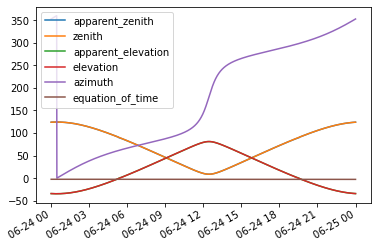

In [5]:
times = pd.date_range(start=datetime.datetime(2014,6,24), end=datetime.datetime(2014,6,25), freq='1Min', tz=tus.tz)

solpos = pvlib.solarposition.get_solarposition(times, tus.latitude, tus.longitude)
print(solpos.head())
solpos.plot();

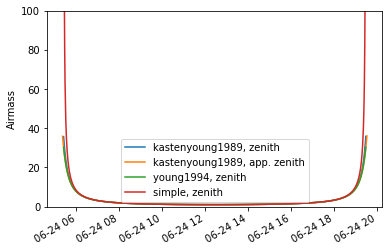

In [6]:
pvlib.atmosphere.get_relative_airmass(solpos['zenith']).plot(label='kastenyoung1989, zenith')
pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith']).plot(label='kastenyoung1989, app. zenith')
pvlib.atmosphere.get_relative_airmass(solpos['zenith'], model='young1994').plot(label='young1994, zenith')
pvlib.atmosphere.get_relative_airmass(solpos['zenith'], model='simple').plot(label='simple, zenith')
plt.legend()
plt.ylabel('Airmass')
plt.ylim(0,100);

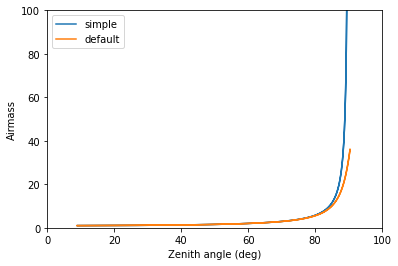

In [7]:
plt.plot(solpos['zenith'], pvlib.atmosphere.get_relative_airmass(solpos['zenith'], model='simple'), label='simple')
plt.plot(solpos['zenith'], pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith']), label='default')
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('Zenith angle (deg)')
plt.ylabel('Airmass')
plt.legend();